In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
# Load Datasets


fake = pd.read_csv(r"C:\Users\shrut\Downloads\Fake.csv")
true = pd.read_csv(r"C:\Users\shrut\Downloads\True.csv")

print("Fake dataset shape:", fake.shape)
print("True dataset shape:", true.shape)

fake.head()

Fake dataset shape: (23481, 4)
True dataset shape: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [48]:
# Add Labels
fake["label"] = 0   # Fake = 0
true["label"] = 1   # True = 1

df = pd.concat([fake, true], axis=0).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [52]:
# Step 3: Check & Clean Text

print("Missing values:", df["text"].isnull().sum())

df["text"] = df["text"].astype(str).fillna("")

import re, string
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df["text"] = df["text"].apply(clean_text)
df["text"].head()


Missing values: 1


0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday it was revealed that former milwauke...
3    on christmas day donald trump announced that h...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object

In [55]:
# Split Data
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 33673
Testing samples: 11225


In [58]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)

TF-IDF train shape: (33673, 172848)
TF-IDF test shape: (11225, 172848)


In [59]:
# Train Model
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50)

✅ Accuracy: 0.9942984409799555

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.99      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



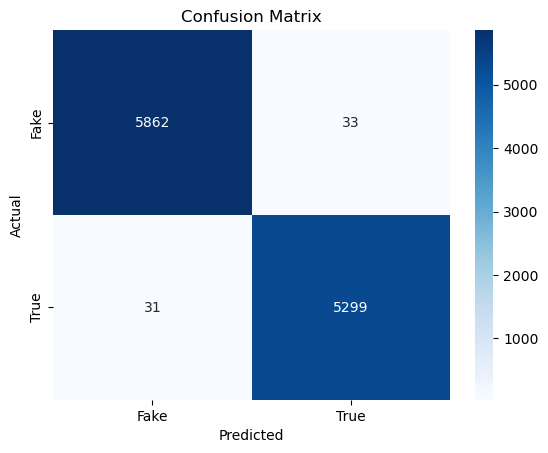

In [60]:
# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



       
